# The Collaboration of Supervised and Unsupervised Learning for Credit Risk Prediction by Caroline Angelina Sunarya

## Load Libraries & Data

In [1]:
!pip install yellowbrick

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [3]:
data = pd.read_csv('loan_data_2007_2014.csv')
data.head()

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melihat 5 barisan pertama dari dataset yang digunakan, dapat terlihat bahwa beberapa kolom memiliki nilai NaN error value, yaitu terdapat pada kolom `total_bal_il`, `il_util`, `open_rv_24m`, `max_bal_bc`, `all_util`, `total_rev_hi_lim`, `inq_fi`, `total_cu_tl`, dan `inq_last_12m`.

*Looking at the first 5 rows of the dataset used, it can be seen that several columns have NaN error values, namely in the columns `total_bal_il`, `il_util`, `open_rv_24m`, `max_bal_bc`, `all_util`, `total_rev_hi_lim`, `inq_fi `, `total_cu_tl`, and `inq_last_12m`.*

## <a id="1"></a> 1. Exploratory Data Analysis (EDA)

In [4]:
data.drop(['grade', 'sub_grade'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   emp_title                    438697 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float64
 13 

Di dalam dataset yang digunakan, terdapat 74 kolom. Apabila dilihat secara sekilas, jumlah kolom yang memiliki null value terbilang tidak sedikit. Bahkan, beberapa kolom memiliki nilai non-null yang berjumlahkan 0, yang berarti bahwa kolom-kolom 
tersebut tidak memiliki nilai. Kemungkinan lainnya adalah value-value di dalam kolom tersebut tidak dapat dibaca oleh program sehingga untuk melakukan *value imputation* sendiri menjadi tidak mungkin.

*In the dataset used, there are 74 columns. At a glance, the number of columns that have null values is quite great. In fact, some columns have non-null values that add up to 0, which means that the columns has no value. Another possibility is that the values in the column cannot be read by the program so that carrying out value imputation itself becomes impossible.*

In [5]:
visualization = data.copy()

<AxesSubplot:xlabel='installment', ylabel='annual_inc'>

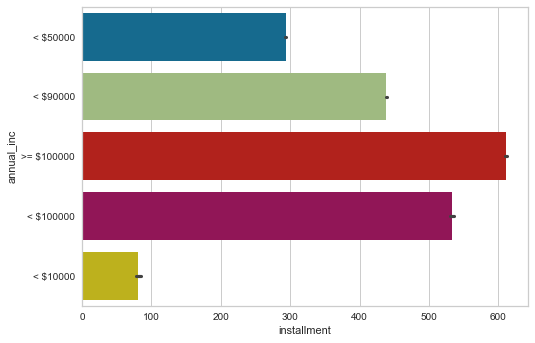

In [6]:
def group_annual_income(income):
    if income < 10000:
        return '< $10000'
    elif income < 50000:
        return '< $50000'
    elif income < 90000:
        return '< $90000'
    elif income < 100000:
        return '< $100000'
    else:
        return '>= $100000'

visualization['annual_inc'] = visualization['annual_inc'].apply(group_annual_income)

sns.barplot(x = "installment", y = "annual_inc", data = visualization)

Peminjam dengan gaji pertahun lebih dari `$100000` melakukan pembayaran tertinggi setiap bulannya, dan peminjam dengan gaji pertahun kurang dari `$10000` melakukan pembayaran terendah setiap bulannya.

*Loaners with an annual salary of more than `$100000` make the highest monthly payments, and loaners with an annual salary of less than `$10000` make the lowest monthly payments.*

<AxesSubplot:xlabel='total_acc', ylabel='annual_inc'>

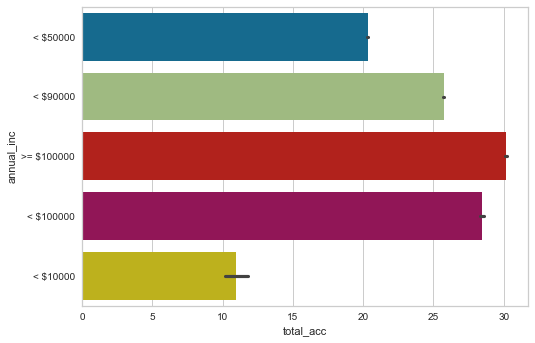

In [7]:
sns.barplot(x = "total_acc", y = "annual_inc", data = visualization)

Peminjam dengan gaji pertahun lebih dari `$100000` memiliki jumlah akun sekitar 30 dan menjadi pemilik akun terbanyak, sedangkan peminjam dengan gaji pertahun kurang dari `$10000` memiliki jumlah akun terdikit dengan jumlah akun sekitar di 10 hingga 13.

*loaners with an annual salary of more than `$100,000` have the number of accounts around 30 and are the largest account holders, while loaners with an annual salary of less than `$10000` have the fewest accounts with the number of accounts around 10 to 13.*

### <a id="1.1"></a> 1.1 Missing Values Handling

In [8]:
data_eda = data.copy()

columns = ['Unnamed: 0', 'id', 'member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 
           'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 
           'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
           'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
data_eda.drop(columns, axis = 1, inplace = True)

data_eda.shape

(466285, 48)

Selain kolom-kolom yang berisikan NaN value, kolom lain seperti `desc`, `mths_since_last_delinq`, `mths_since_last_record`, `next_pymnt_d`, dan `mths_since_last_major_derog` juga turut serta dihapus dikarenakan memiliki persentase *missing values* yang tinggi (sekitar 50% atau lebih). Selain itu, kolom `Unnamed: 0`, `id`, dan `member_id` juga dihapus dikarenakan nilai-nilai pada kolom-kolom tersebut berbeda-beda tiap barisnya sehingga tidak dapat digunakan dalam proses pembangunan model.

*Apart from columns containing NaN values, other columns such as `desc`, `mths_since_last_delinq`, `mths_since_last_record`, `next_pymnt_d`, and `mths_since_last_major_derog` were also deleted due to having a high percentage of missing values (around 50% or more). Apart from that, the `Unnamed: 0`, `id`, and `member_id` columns were also deleted because the values in these columns were different for each row so they could not be used in the model building process.*

In [9]:
data_eda.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                   

Terdapat beberapa kolom yang masih memiliki *missing values* yang dengan jumlah *missing values* yang tertinggi adalah 70276 atau sekitar 15% dari keseluruhan data. Dikarenakan data yang digunakan adalah data customer, imputasi data tidak akan dilakukan dikarenakan adanya kemungkinan yang dapat menjadikan kualitas keseluruhan data menjadi memburuk. Sehingga, barisan data yang memiliki *missing values* akan dihapus.

*There are several columns that still have missing values, with the highest number of missing values being 70276 or around 15% of the total data. Because the data used is customer data, data imputation will not be carried out due to the possibility that the overall quality of the data will worsen in another word will cause data bias. So, rows of data that have missing values will be deleted.*

In [10]:
data_eda.dropna(axis = 0, inplace = True)
data_eda.shape

(372162, 48)

Setelah dilakukan penghapusan barisan data yang memiliki missing values di salah satu atau lebih kolom, jumlah barisan data yang dimiliki adalah 372162 barisan data.

*After deleting rows of data that have missing values in one or more columns, the number of rows of data that we have is 372162 rows of data.*

In [11]:
data_eda[data_eda.duplicated(keep = False)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


Tidak didapatkan duplikasi data pada dataset yang digunakan.

*There are no data duplication found in the dataset.*

### <a id="1.2"></a> 1.2 Correlation Check

<AxesSubplot:>

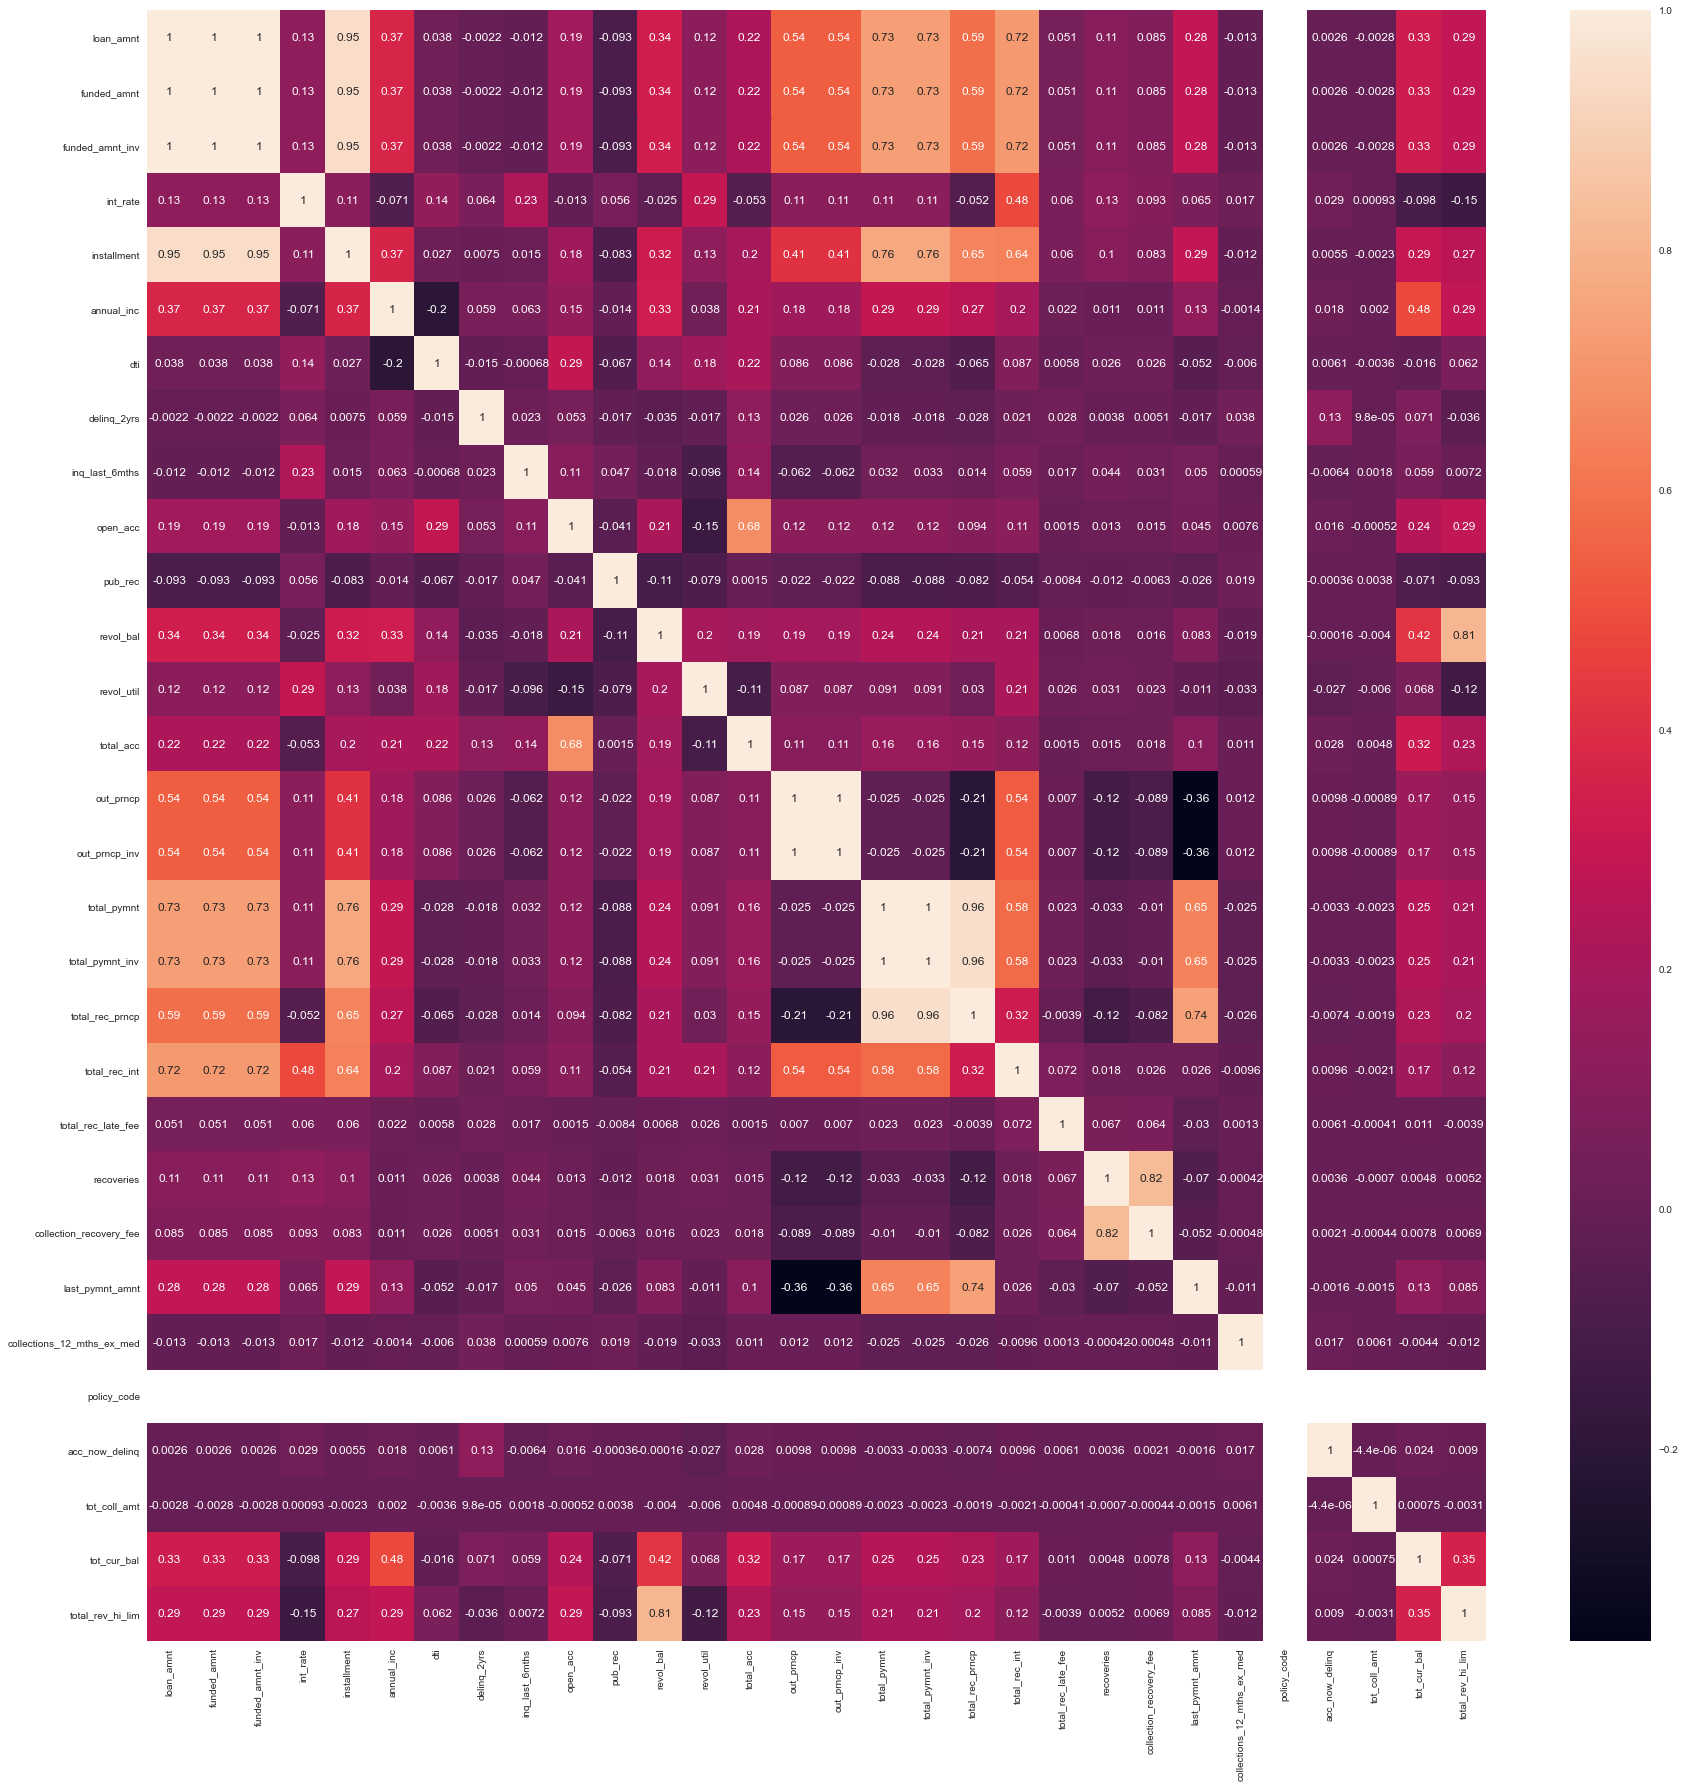

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(data_eda.corr(), annot = True)

Secara keseluruhan, koefisien korelasi antara variabel-variabel sudah baik. Variabel-variabel tersebut memiliki angka koefisien korelasi yang terbilang rendah. Namun, ada beberapa kolom yang memiliki korelasi yang sangat tinggi seperti:


*Overall, the correlation coefficient between the variables is good. These variables have relatively low correlation coefficient numbers. However, there are some columns that have a very high correlation such as:*

- `installment` dengan `loan_amnt`, `funded_amnt`, dan `funded_amnt_inv`
- `loan_amnt` dengan `funded_amnt`
- `loan_amnt` dengan `funded_amnt_inv`
- `funded_amnt` dengan `funded_amnt_inv`
- `total_acc` dengan `open_acc`
- `out_prncp` dengan `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `out_prncp_inv`, dan `total_rec_int`
- `out_prncp_inv` dengan `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `out_prcnp`, dan `total_rec_int`
- `total_pymnt` dengan `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, dan `last_pymnt_amnt`
- `total_pymnt_inv` dengan `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `total_pymnt`, `total_rec_prncp`, `total_rec_int`, dan `last_pymnt_amnt`
- `total_rec_prcnp` dengan `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `total_pymnt`, `total_pymnt_inv`, dan `last_pymnt_amnt`
- `total_rec_int` dengan `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, dan `total_pymnt_inv`
- `collection_recovery_fee` dengan `recoveries`
- `last_pymnt_amnt` dengan `total_pymnt`, `total_pymnt_inv`, dan `total_rec_prncp`
- `total_rev_hi_lim` dengan `revol_bal`


- *`installment` with `loan_amnt`, `funded_amnt`, and `funded_amnt_inv`*
- *`loan_amnt` with `funded_amnt`*
- *`loan_amnt` with `funded_amnt_inv`*
- *`funded_amnt` with `funded_amnt_inv`*
- *`total_acc` with `open_acc`*
- *`out_prncp` with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `out_prncp_inv`, and `total_rec_int`*
- *`out_prncp_inv` with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `out_prcnp`, and `total_rec_int`*
- *`total_pymnt` with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, and `last_pymnt_amnt`*
- *`total_pymnt_inv` with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `total_pymnt`, `total_rec_prncp`, `total_rec_int`, and `last_pymnt_amnt`*
- *`total_rec_prcnp` with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `total_pymnt`, `total_pymnt_inv`, and `last_pymnt_amnt`*
- *`total_rec_int` with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, and `total_pymnt_inv`*
- *`collection_recovery_fee` with `recoveries`*
- *`last_pymnt_amnt` with `total_pymnt`, `total_pymnt_inv`, and `total_rec_prncp`*
- *`total_rev_hi_lim` with `revol_bal`*

Maka beberapa kolom harus dihapus untuk menjaga koefisien korelasi yang rendah. *Threshold* atau nilai batas yang digunakan adalah 0.5.

*Therefore, some columns have to be deleted to keep the correlation coefficient low. Threshold or limit value used is 0.5.*

<AxesSubplot:>

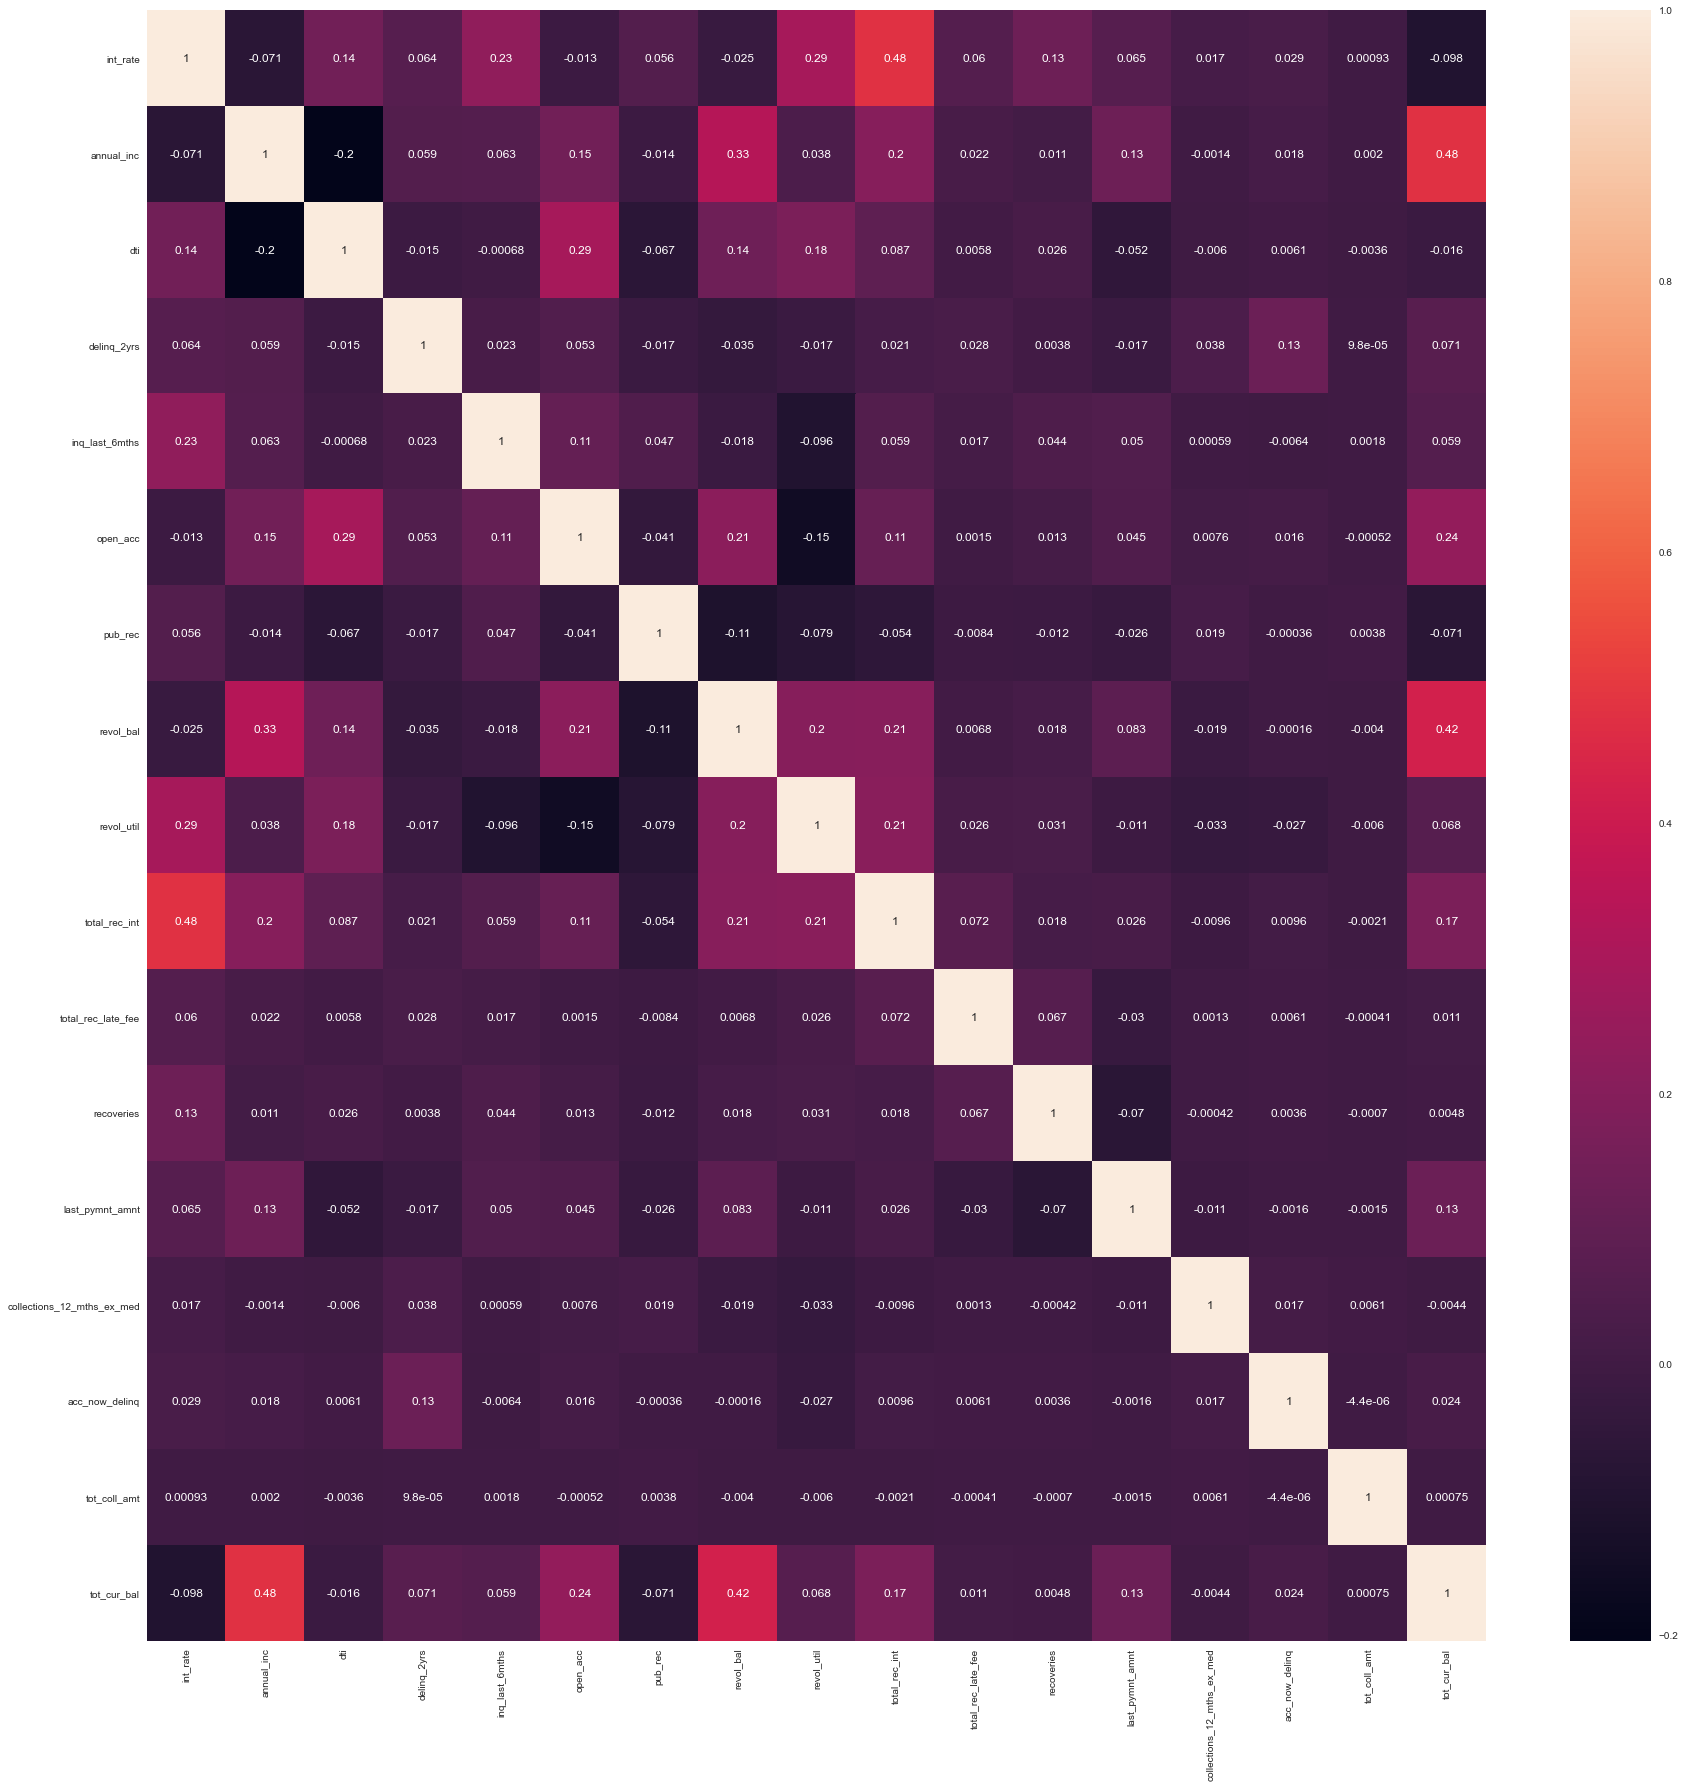

In [13]:
data_eda_2 = data_eda.copy()

columns = ['policy_code', 'out_prncp', 'total_pymnt', 'funded_amnt_inv', 'loan_amnt', 'installment', 'total_acc', 
           'funded_amnt', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee', 'total_rev_hi_lim',
           'out_prncp_inv']
data_eda_2.drop(columns, axis = 1, inplace = True)

plt.figure(figsize=(30,30))
sns.heatmap(data_eda_2.corr(), annot = True)

## <a id="2"></a> 2. Data Preprocessing

In [14]:
data_prepro = data_eda_2.copy()

In [15]:
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372162 entries, 42535 to 466283
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        372162 non-null  object 
 1   int_rate                    372162 non-null  float64
 2   emp_title                   372162 non-null  object 
 3   emp_length                  372162 non-null  object 
 4   home_ownership              372162 non-null  object 
 5   annual_inc                  372162 non-null  float64
 6   verification_status         372162 non-null  object 
 7   issue_d                     372162 non-null  object 
 8   loan_status                 372162 non-null  object 
 9   pymnt_plan                  372162 non-null  object 
 10  url                         372162 non-null  object 
 11  purpose                     372162 non-null  object 
 12  title                       372162 non-null  object 
 13  zip_code  

### <a id="2.1"></a> 2.1 Data Cleaning

In [16]:
data_prepro.select_dtypes('object').describe().T

,count,unique,top,freq
term,372162,2,36 months,264408
emp_title,372162,166066,Teacher,5391
emp_length,372162,11,10+ years,130929
home_ownership,372162,6,MORTGAGE,192973
verification_status,372162,3,Verified,127252
issue_d,372162,29,Oct-14,36651
loan_status,372162,7,Current,206686
pymnt_plan,372162,2,n,372157
url,372162,372162,https://www.lendingclub.com/browse/loanDetail....,1
purpose,372162,13,debt_consolidation,226339


Kolom `url` memiliki 372162 *unique values* yang dimana hal tersebut mengindikasikan bahwa value setiap barisnya berbeda-beda. Oleh karena itu, kolom `url` dapat dihapus. Kemudian, kolom `title` dapat dihapus juga dikarenakan sudah ter-*cover* dengan kolom `purpose`. Kolom `last_credit_pull_d` juga dihapus dikarenakan diduga memiliki value yang sama dengan `last_pymnt_d` dan juga tidak disediakan deskripsi mengenai kolom tersebut. Terakhir, kolom `application_type` juga dapat dihapus dikarenakan hanya memiliki 1 *unique values*.

*The `url` column has 372162 unique values which indicates that the value for each row is different. Therefore, the `url` column can be removed. Then, the `title` column can also be deleted because it has been covered by the `purpose` column. The `last_credit_pull_d` column was also deleted because it was thought to have the same value as `last_pymnt_d` and no description of this column was provided. Finally, the `application_type` column can also be deleted because it only has 1 unique value.*

In [17]:
columns = ['url', 'title', 'last_credit_pull_d', 'application_type']
data_prepro.drop(columns, axis = 1, inplace = True)
data_prepro.shape

(372162, 31)

### <a id="2.2"></a> 2.2 Data Transformation

In [18]:
columns = ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
           'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
           'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']
for i in columns:
    print(i)
    print(data_prepro[i].unique())

int_rate
[10.99 13.98  6.62 13.53  8.9  11.99 12.85 16.24  9.67  7.62 19.97 14.98
 22.9  14.47 19.22 20.5  15.61 18.25 21.48  6.03  7.9  17.57 22.4  23.4
 16.99 23.7  25.89 25.8  24.08 24.99 25.57 26.06 25.99 24.5  25.83  6.
 21.7  13.67 17.76 15.1  14.3  18.55 19.52 16.2  19.2  20.2  12.99 17.1
 23.1  21.    9.99  6.97  8.6   9.25 11.55 13.68 15.22 15.88 22.7   9.71
 21.6  22.2  18.85 14.33 17.56 16.78 13.05 24.89 23.5  21.15 12.35 20.8
 10.64 20.31 25.28 19.05 15.31 23.28 11.14 10.16 17.27 13.11 14.09 18.75
 17.77 12.12 15.8  19.72 16.29 23.76 18.49 20.49 24.7  21.98 23.83 23.63
 22.47 22.95 21.49 24.83 12.39  6.99 13.66 17.14 15.59 11.44 21.99 14.31
 17.86 10.49 15.99 14.99 19.99  9.49 20.99 16.49  7.49  8.19 22.99  8.67
 18.54 19.24  6.49 23.99 13.35 10.15  8.39 11.67  7.69 18.24  9.17 12.49
 14.49 18.99 22.15 23.43  7.12 13.65 14.64 21.18 19.47 18.92 22.45 14.16
 16.59]
annual_inc
[ 55000.  26000. 105000. ... 113926.  72787.  57231.]
dti
[22.87 25.12 14.05 ...  0.05  0.04  0.15]
d

In [19]:
data_prepro[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
int_rate,372162.0,14.037092,4.382131,6.00,10.990,13.980,16.9900,26.06
annual_inc,372162.0,74997.628014,54916.786154,4000.00,47000.000,65000.000,90000.0000,7500000.00
dti,372162.0,17.705230,7.846335,0.00,11.810,17.310,23.3400,39.99
delinq_2yrs,372162.0,0.310781,0.837891,0.00,0.000,0.000,0.0000,29.00
inq_last_6mths,372162.0,0.775125,1.036308,0.00,0.000,0.000,1.0000,8.00
open_acc,372162.0,11.523780,5.041112,1.00,8.000,11.000,14.0000,84.00
pub_rec,372162.0,0.173008,0.534421,0.00,0.000,0.000,0.0000,63.00
revol_util,372162.0,57.012586,22.934083,0.00,40.600,58.200,74.8000,892.30
total_rec_int,372162.0,2630.547489,2421.431588,0.00,1017.600,1892.955,3377.9700,21840.00
total_rec_late_fee,372162.0,0.541729,4.840677,0.00,0.000,0.000,0.0000,358.68


Dapat terlihat bahwa beberapa kolom memiliki nilai outliers, tetapi dikarenakan data yang digunakan merupakan data customer maka nilai outliers tersebut tidak akan dibuang. Membuang nilai outliers dapat membuat performa model tidak bagus. 

*It can be seen that some columns have outlier values, but because the data used is customer data, these outlier values ​​will not be discarded. Discarding outliers can result in poor model performance when implemented in real life.*

In [20]:
def group_int_rate(rate):
    if rate < 6:
        return '< 6'
    elif rate < 10:
        return '< 10'
    elif rate < 14:
        return '< 14'
    elif rate < 20:
        return '< 20'
    else:
        return '>= 20'

def group_annual_income(income):
    if income < 10000:
        return '< $10000'
    elif income < 50000:
        return '< $50000'
    elif income < 90000:
        return '< $90000'
    elif income < 100000:
        return '< $100000'
    else:
        return '>= $100000'

def group_open_acc(acc):
    if acc < 5:
        return '< 5'
    elif acc < 10:
        return '< 10'
    elif acc < 15:
        return '< 15'
    elif acc < 20:
        return '< 20'
    else: 
        return '>= 20'

In [21]:
data_transform = data_prepro.copy()
data_transform['int_rate'] = data_transform['int_rate'].apply(group_int_rate)
data_transform['annual_inc'] = data_transform['annual_inc'].apply(group_annual_income)
data_transform['open_acc'] = data_transform['open_acc'].apply(group_open_acc)
data_transform.head()

,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,36 months,< 14,Team Leadern Customer Ops & Systems,10+ years,OWN,< $90000,Verified,Dec-13,Current,n,...,w,4219.94,0.0,0.0,Jan-16,885.46,0.0,0.0,0.0,114834.0
42536,36 months,< 14,Medical Assistant,1 year,RENT,< $50000,Not Verified,Dec-13,Current,n,...,f,1955.79,0.0,0.0,Jan-16,333.14,0.0,0.0,0.0,14123.0
42537,36 months,< 10,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,>= $100000,Not Verified,Dec-13,Current,n,...,w,1109.42,0.0,0.0,Jan-16,368.45,0.0,0.0,0.0,267646.0
42538,36 months,< 14,On road manager,10+ years,RENT,< $50000,Source Verified,Dec-13,Fully Paid,n,...,w,1359.78,0.0,0.0,Sep-15,119.17,0.0,0.0,15386.0,13605.0
42539,36 months,< 10,aircraft maintenance engineer,2 years,MORTGAGE,< $90000,Not Verified,Dec-13,Current,n,...,w,1880.47,0.0,0.0,Jan-16,476.30,0.0,0.0,1514.0,272492.0


Dilakukan pengkategorian data kembali untuk mengecilkan dimensi dari data yang diberikan. Pengkategorian data tersebut dilakukan dengan melihat nilai Q1, median, dan Q3.

*The data was re-categorized to reduce the dimensions of the data provided. Categorization of the data is done by looking at the Q1, median and Q3 values.*

### <a id="2.3"></a> 2.3 Data Encoding

In [23]:
oh_enc = OneHotEncoder()
or_enc = OrdinalEncoder()
lb_enc = LabelEncoder()

In [24]:
ordinal_data = ['int_rate', 'annual_inc', 'verification_status', 'initial_list_status']

data_encoded = data_transform.copy()
data_encoded[ordinal_data] = or_enc.fit_transform(data_encoded[ordinal_data])
data_encoded.head()

,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,36 months,1.0,Team Leadern Customer Ops & Systems,10+ years,OWN,3.0,2.0,Dec-13,Current,n,...,1.0,4219.94,0.0,0.0,Jan-16,885.46,0.0,0.0,0.0,114834.0
42536,36 months,1.0,Medical Assistant,1 year,RENT,2.0,0.0,Dec-13,Current,n,...,0.0,1955.79,0.0,0.0,Jan-16,333.14,0.0,0.0,0.0,14123.0
42537,36 months,0.0,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,4.0,0.0,Dec-13,Current,n,...,1.0,1109.42,0.0,0.0,Jan-16,368.45,0.0,0.0,0.0,267646.0
42538,36 months,1.0,On road manager,10+ years,RENT,2.0,1.0,Dec-13,Fully Paid,n,...,1.0,1359.78,0.0,0.0,Sep-15,119.17,0.0,0.0,15386.0,13605.0
42539,36 months,0.0,aircraft maintenance engineer,2 years,MORTGAGE,3.0,0.0,Dec-13,Current,n,...,1.0,1880.47,0.0,0.0,Jan-16,476.30,0.0,0.0,1514.0,272492.0


In [25]:
categorical_columns = data_encoded.select_dtypes('object').columns
label_encode = data_encoded[categorical_columns].apply(lambda x: lb_enc.fit_transform(x))
data_encoded = pd.concat([data_encoded, label_encode], axis=1)
data_encoded.drop(categorical_columns, axis=1, inplace=True)
data_encoded.head()

,int_rate,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,1.0,3.0,2.0,22.87,0.0,0.0,0.0,36638,61.2,1.0,4219.94,0.0,0.0,885.46,0.0,0.0,0.0,114834.0
42536,1.0,2.0,0.0,25.12,0.0,0.0,0.0,7967,52.8,0.0,1955.79,0.0,0.0,333.14,0.0,0.0,0.0,14123.0
42537,0.0,4.0,0.0,14.05,0.0,1.0,0.0,13168,21.6,1.0,1109.42,0.0,0.0,368.45,0.0,0.0,0.0,267646.0
42538,1.0,2.0,1.0,16.94,0.0,0.0,2.0,5572,68.8,1.0,1359.78,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0
42539,0.0,3.0,0.0,16.51,0.0,0.0,0.0,11431,74.2,1.0,1880.47,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0


## <a id="3"></a> 3. Clustering

In [26]:
data_cluster = data_encoded.copy()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_k

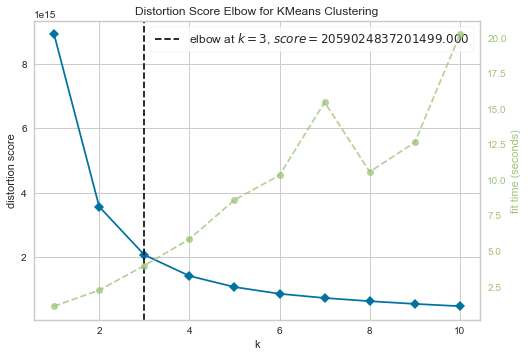

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state = 42), k = (1,11))
visualizer.fit(data_cluster)
visualizer.show()

Menggunakan *elbow method*, jumlah klaster yang sebaiknya digunakan untuk memprediksi credit risk adalah 3.

*Using the elbow method, the number of clusters that should be used to predict credit risk is 3.*

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(data_cluster)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [29]:
data_2 = data_transform.copy()
data_2['target'] = kmeans.labels_
data_2['target'].value_counts()

0    226632
2    119112
1     26418
Name: target, dtype: int64

Jumlah persebaran data pada klaster pertama atau `1` adalah 26415 data, jumlah persebaran data pada klaster kedua atau `0`adalah 119106, dan jumlah persebaran data pada klaster ketiga atau `2` adalah 226641. Klaster-klaster tersebut memiliki *imbalanced distribution* dimana klaster `2` memiliki jumlah data yang terbesar, dan klaster `1` memiliki jumlah data yang terkecil. 

*The number of data distributions in the first cluster or `1` is 26415 data, the number of data distributions in the second cluster or `0` is 119106, and the number of data distributions in the third cluster or `2` is 226641. These clusters have imbalanced data distribution where cluster `2` has the largest amount of data, and cluster `1` has the smallest amount of data.*

In [30]:
data_2.query("target == 0").select_dtypes('object').describe().T

,count,unique,top,freq
term,226632,2,36 months,171528
int_rate,226632,4,< 20,92891
emp_title,226632,110859,Teacher,3070
emp_length,226632,11,10+ years,70789
home_ownership,226632,6,RENT,137907
annual_inc,226632,5,< $90000,101678
verification_status,226632,3,Not Verified,80049
issue_d,226632,29,Oct-14,22873
loan_status,226632,7,Current,124933
pymnt_plan,226632,2,n,226630


Klaster `0` atau `low-risk` mayoritas berciri-ciri angsuran dilakukan dalam waktu 36 bulan, memiliki pekerjaan sebagai guru dengan lama bekerja lebih dari 10 tahun, status *home ownership* adalah *rent*, jumlah pendapatan setiap tahunnya dibawah $90000, tujuan peminjaman adalah *debt consolidation*, dan memiliki jumlah akun kurang dari 10.

*The majority of the `0` or `low-risk` clusters are characterized by installments made within 36 months, have a job as a teacher with more than 10 years of service, home ownership status is rent, annual income is below $90000. The purpose of loaning is debt consolidation, and having less than 10 accounts.*

In [31]:
data_2.query("target == 1").select_dtypes('object').describe().T

,count,unique,top,freq
term,26418,2,36 months,16815
int_rate,26418,4,< 20,8498
emp_title,26418,14862,Manager,349
emp_length,26418,11,10+ years,11041
home_ownership,26418,5,MORTGAGE,23689
annual_inc,26418,4,>= $100000,19449
verification_status,26418,3,Verified,12885
issue_d,26418,29,Oct-14,2652
loan_status,26418,7,Current,15225
pymnt_plan,26418,1,n,26418


Klaster `1` atau `medium-risk` mayoritas berciri-ciri angsuran dilakukan dalam waktu 36 bulan, memiliki pekerjaan sebagai manager dengan lama bekerja lebih dari 10 tahun, status *home ownership* adalah *mortgage*, jumlah pendapatan setiap tahunnya dibawah diatas $100000, tujuan peminjaman adalah *debt consolidation*, dan memiliki jumlah akun kurang dari 15.

*The majority of cluster `1` or `medium-risk` has the characteristics of installments being made within 36 months, having a job as a manager with a length of service of more than 10 years, home ownership status is mortgage, total annual income is below $100000, the purpose of loaning is debt consolidation, and have less than 15 accounts.*

In [32]:
data_2.query("target == 2").select_dtypes('object').describe().T

,count,unique,top,freq
term,119112,2,36 months,76065
int_rate,119112,4,< 20,43042
emp_title,119112,60167,Teacher,2061
emp_length,119112,11,10+ years,49099
home_ownership,119112,5,MORTGAGE,105100
annual_inc,119112,4,< $90000,65157
verification_status,119112,3,Verified,46435
issue_d,119112,29,Oct-14,11126
loan_status,119112,7,Current,66528
pymnt_plan,119112,2,n,119109


Klaster `2` atau `high-risk` mayoritas berciri-ciri angsuran dilakukan dalam waktu 36 bulan, memiliki pekerjaan sebagai guru dengan lama bekerja lebih dari 10 tahun, status *home ownership* adalah *mortgage*, jumlah pendapatan setiap tahunnya dibawah diatas $90000, status verifikasinya adalah terverifikasi, tujuan peminjaman adalah *debt consolidation*, dan memiliki jumlah akun kurang dari 15.

*The majority of the `2` or `high-risk` clusters are characterized by installments made within 36 months, have a job as a teacher with more than 10 years of service, home ownership status is mortgage, annual income is below $90000 , the verification status is verified, the purpose of loaning is debt consolidation, and the number of accounts is less than 15.*

## <a id="4"></a> 4. Data Preprocessing II

In [47]:
data_2.drop(['emp_title', 'issue_d', 'zip_code', 'earliest_cr_line', 'last_pymnt_d'], axis = 1, inplace = True)

In [48]:
columns = []
for i in data_2.select_dtypes('object'):
    columns.append(i)

In [49]:
data_2_encoded = data_2.copy()
label_encode_2 = data_2_encoded[columns].apply(lambda x: lb_enc.fit_transform(x))
data_2_encoded = pd.concat([data_2_encoded, label_encode_2], axis=1)
data_2_encoded.drop(columns, axis=1, inplace=True)
data_2_encoded.head()

,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,target
42535,22.87,0.0,0.0,0.0,36638,61.2,4219.94,0.0,0.0,885.46,0.0,0.0,0.0,114834.0,0
42536,25.12,0.0,0.0,0.0,7967,52.8,1955.79,0.0,0.0,333.14,0.0,0.0,0.0,14123.0,0
42537,14.05,0.0,1.0,0.0,13168,21.6,1109.42,0.0,0.0,368.45,0.0,0.0,0.0,267646.0,2
42538,16.94,0.0,0.0,2.0,5572,68.8,1359.78,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0,0
42539,16.51,0.0,0.0,0.0,11431,74.2,1880.47,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0,2


In [58]:
x = data_2_encoded.drop(['target'], axis = 1)
y = data_2_encoded['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Data dibagi menjadi train dan test untuk melakukan modelling dengan persentase data untuk testing setnya adalah 20% dan persentase data untuk training setnya adalah 80%.

*The data is divided into train and test for modeling with the percentage of data for the testing set being 20% ​​and the percentage of data for the training set being 80%.*

## <a id="5"></a> 5. Modelling

In [59]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier()
abModel = adaBoost.fit(x_train, y_train)
abPred = adaBoost.predict(x_test)

print('==========================')
print('AdaBoost Classifier Report')
print('==========================')
roc = cross_val_score(adaBoost, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(adaBoost, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,abPred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

AdaBoost Classifier Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45385
           1       1.00      0.21      0.35      5215
           2       0.84      1.00      0.91     23833

    accuracy                           0.94     74433
   macro avg       0.95      0.73      0.75     74433
weighted avg       0.95      0.94      0.92     74433

Average ROC score: 0.9992990044019909
Average accuracy: 0.7902119041141441


Menggunakan algoritma `Ada Boost Classifier` rata-rata nilai ROC yang didapatkan sebesar 99.9% dan rata-rata akurasi dari model adalah 79%. Model bekerja dengan baik untuk klaster `0` dan `2`, sedangkan model overfit untuk klaster `1`. Hal tersebut dapat terjadi karena dipengaruhi oleh *imbalance data distribution*. Melihat dari nilai macro avg dengan recall dan f1-score, persentase yang ditunjukkan relatif lebih rendah dibandingkan nilai akurasi yang diberikan. Hal tersebut dapat dikarenakan oleh ketidakseimbangan data. Oleh karena itu, teknik SMOTE dapat dilakukan untuk lebih mengoptimasi performa model.

*Using the `Ada Boost Classifier` algorithm the average ROC value obtained was 99.9% and the average accuracy of the model was 79%. The model performs well for clusters `0` and `2`, while the model overfits for cluster `1`. This can happen because it is influenced by imbalance data distribution. Looking at the macro avg value with recall and f1-score, the percentage shown is relatively lower than the accuracy percentage given. This can be caused by data imbalance. Therefore, the SMOTE technique can be performed to further optimize model performance.*